In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
dev_df = pd.read_csv('dev.csv')

In [4]:
#각 데이터셋의 칼럼
print(
    "train_data =", train_df.columns,
    "\ntest_data =", test_df.columns,
    "\ndev_data =", dev_df.columns
    )

train_data = Index(['id', 'source', 'sentence_1', 'sentence_2', 'label', 'binary-label'], dtype='object') 
test_data = Index(['id', 'source', 'sentence_1', 'sentence_2'], dtype='object') 
dev_data = Index(['id', 'source', 'sentence_1', 'sentence_2', 'label', 'binary-label'], dtype='object')


In [5]:
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [6]:
print(train_df.info())
print("="*50)
print(test_df.info())
print("="*50)
print(dev_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1100 non-null   object
 1   source      1100 non-null   object
 2   sentence_1  1100 non-null   object
 3   sentence_2  1100 non-null   object
dtypes: object(4)
memory usage: 34.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 colum

In [23]:
def EDA(df, name):

    #source가 각각 몇 번 나오는지
    if 'source' in df.columns:

        source_counts = df['source'].value_counts()

        plt.figure(figsize=(10, 6))
        axes = source_counts.plot(kind='bar')
        source_counts.plot(kind='bar')
        plt.title(f"{name} - source")
        plt.xticks(rotation=45)

        for i, v in enumerate(source_counts):
            axes.text(i, v, str(v), ha='center', va='bottom')

        plt.show()


    #sentence 1, 2 길이
    if 'sentence_1' in df.columns and 'sentence_2' in df.columns:
        df['sentence_1_length'] = df['sentence_1'].str.len()
        df['sentence_2_length'] = df['sentence_2'].str.len()

        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        plt.hist(df['sentence_1_length'], bins=30, edgecolor='black')
        plt.title(f"{name} - sentence_1 length")
        plt.xlabel("length")
        plt.ylabel("count")

        plt.subplot(1, 2, 2)
        plt.hist(df['sentence_2_length'], bins=30, edgecolor='black')
        plt.title(f"{name} - sentence_2 length")
        plt.xlabel("length")
        plt.ylabel("count")
        plt.show()

        print(f"문장1 최대 길이: {df['sentence_1_length'].max()}")
        print(f"문장2 최대 길이: {df['sentence_2_length'].max()}")


    #label 점수 통계
    if 'label' in df.columns:
        plt.figure(figsize=(10, 6))
        label_counts = df['label'].value_counts().sort_index()
        axes = label_counts.plot(kind='bar')
        plt.title(f"{name} - label frequency")
        plt.xlabel("label")
        plt.ylabel("count")

        for i, v in enumerate(label_counts):
            axes.text(i, v, str(v), ha='center', va='bottom')
        plt.xticks(rotation=45)
        plt.show()


    if 'binary-label' in df.columns:
        plt.figure(figsize=(10, 6))
        binary_label_counts = df['binary-label'].value_counts().sort_index()
        axes = binary_label_counts.plot(kind='bar')
        plt.title(f"{name}")
        plt.xlabel("binary label")
        plt.ylabel("count")
        for i, v in enumerate(binary_label_counts):
            axes.text(i, v, str(v), ha='center', va='bottom')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

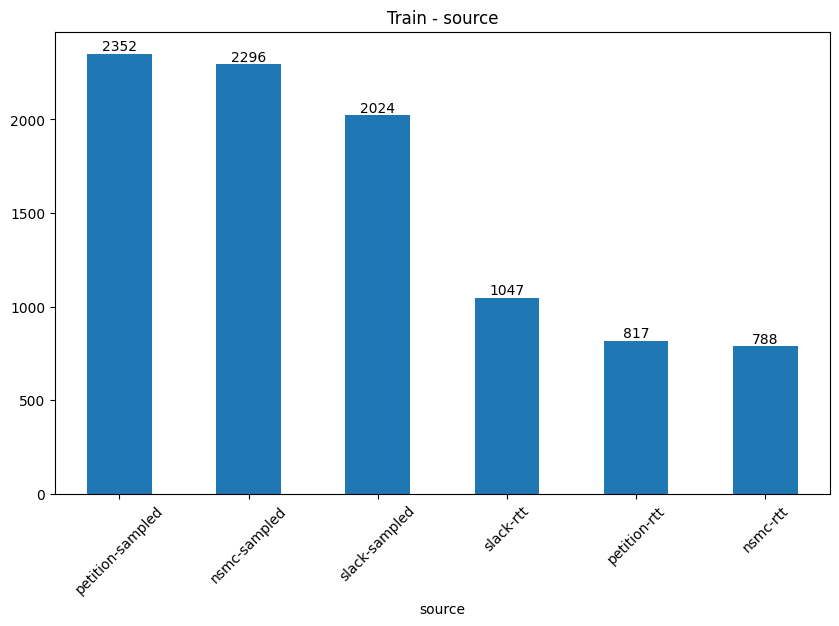

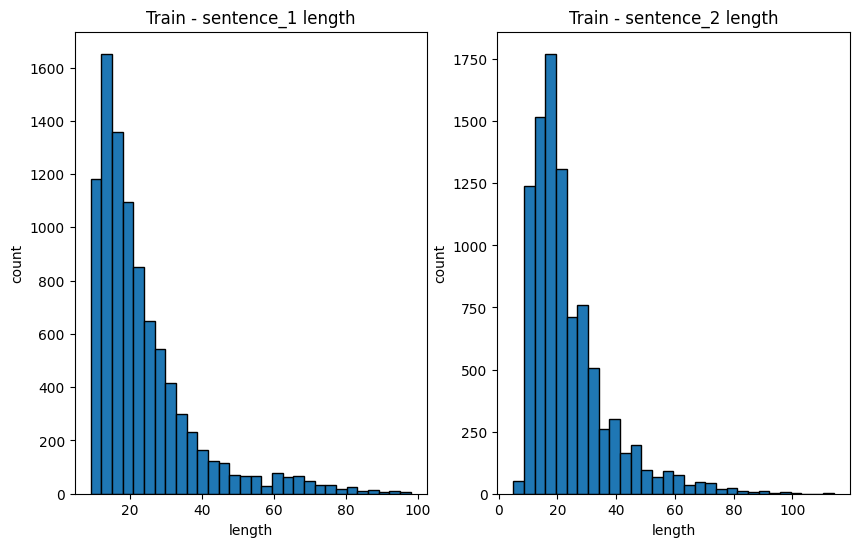

문장1 최대 길이: 98
문장2 최대 길이: 114


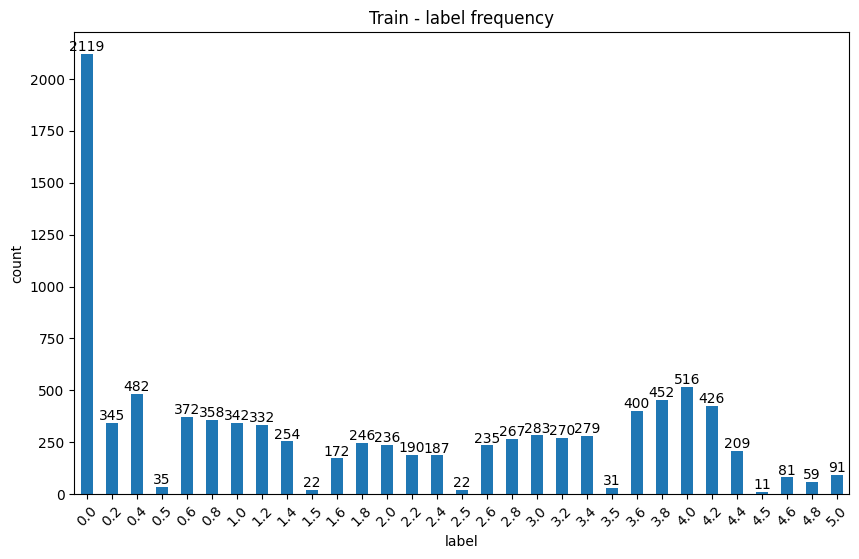

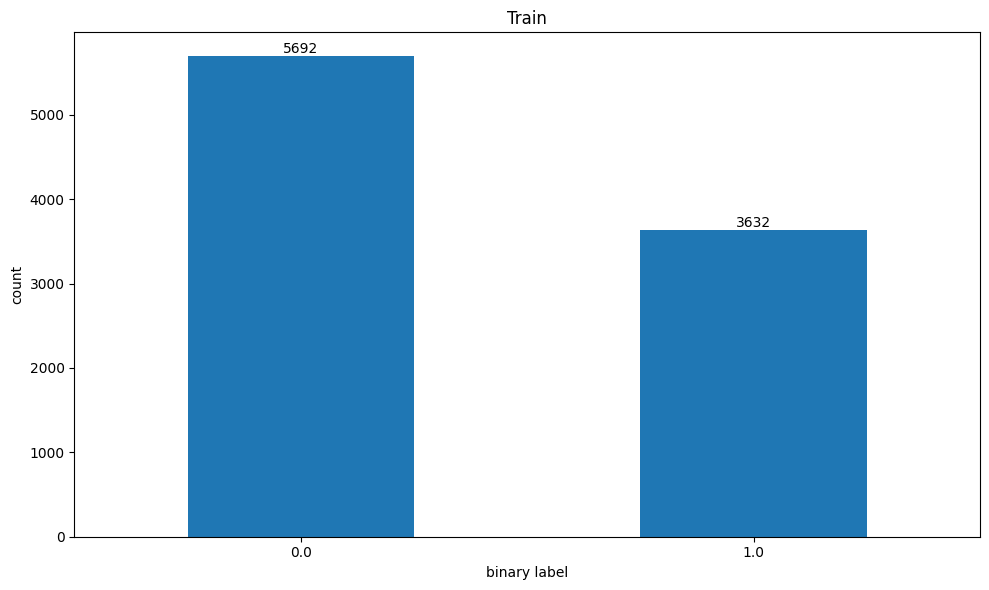

In [24]:
EDA(train_df, "Train")

아예 label에 없는 값들도 있음

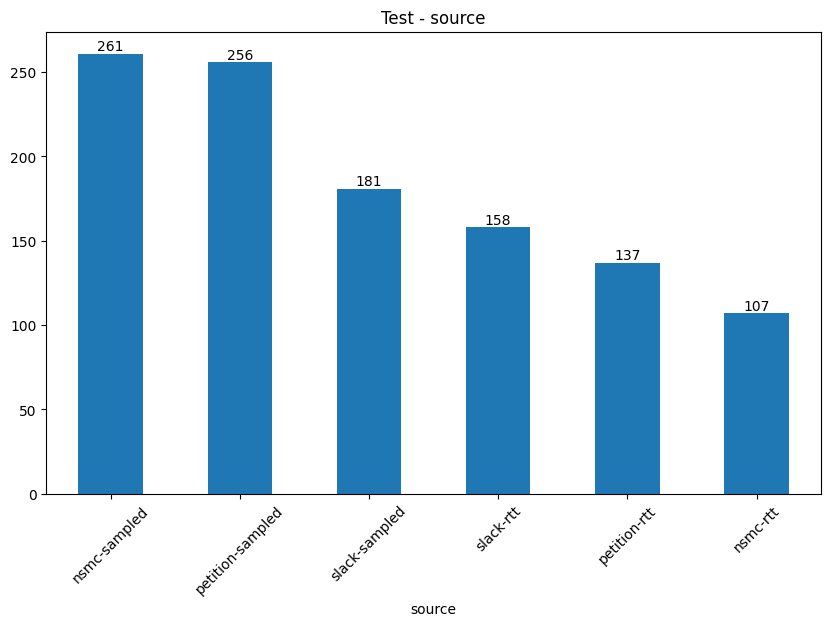

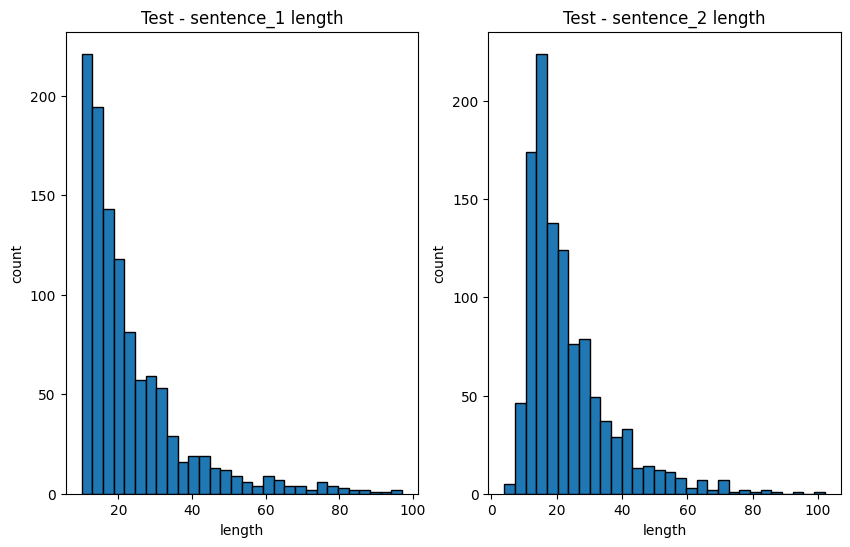

문장1 최대 길이: 97
문장2 최대 길이: 102


In [25]:
EDA(test_df, "Test")

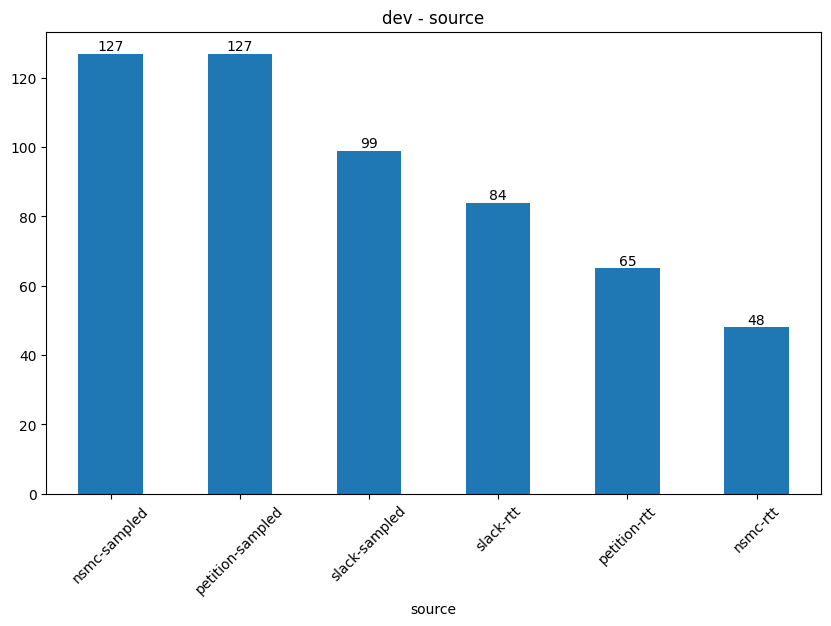

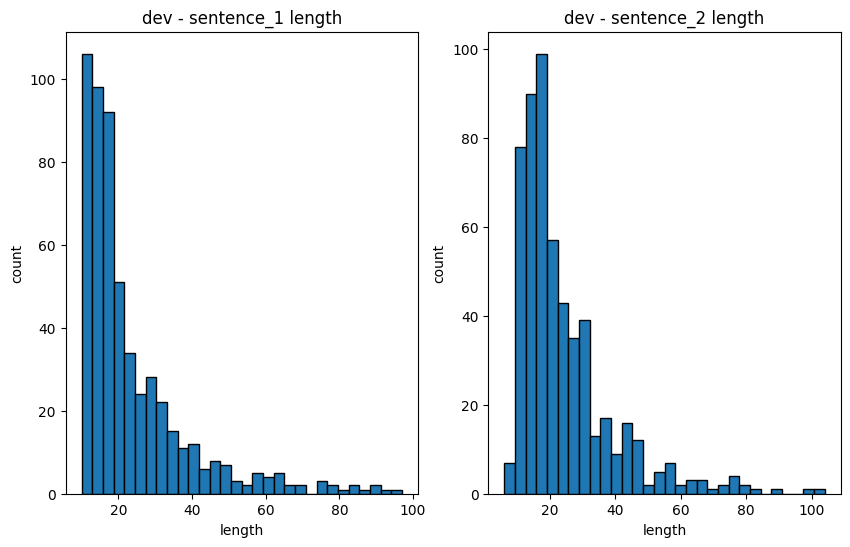

문장1 최대 길이: 97
문장2 최대 길이: 104


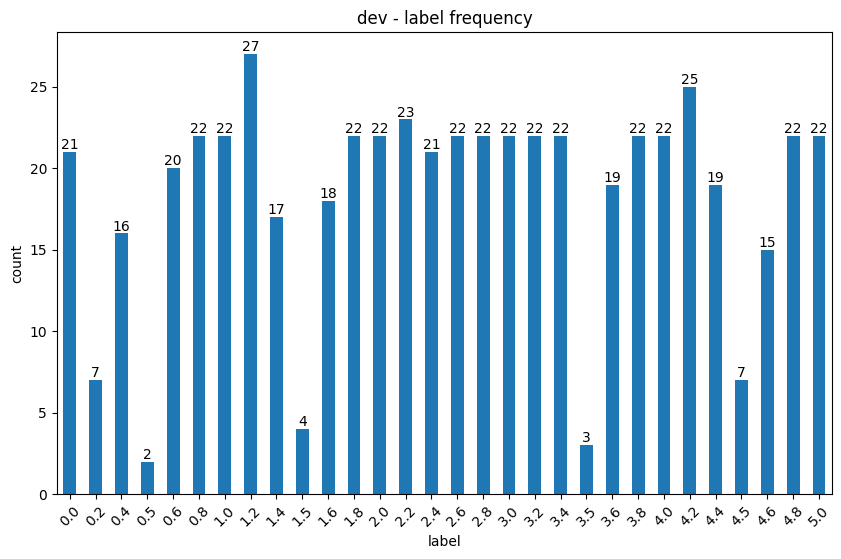

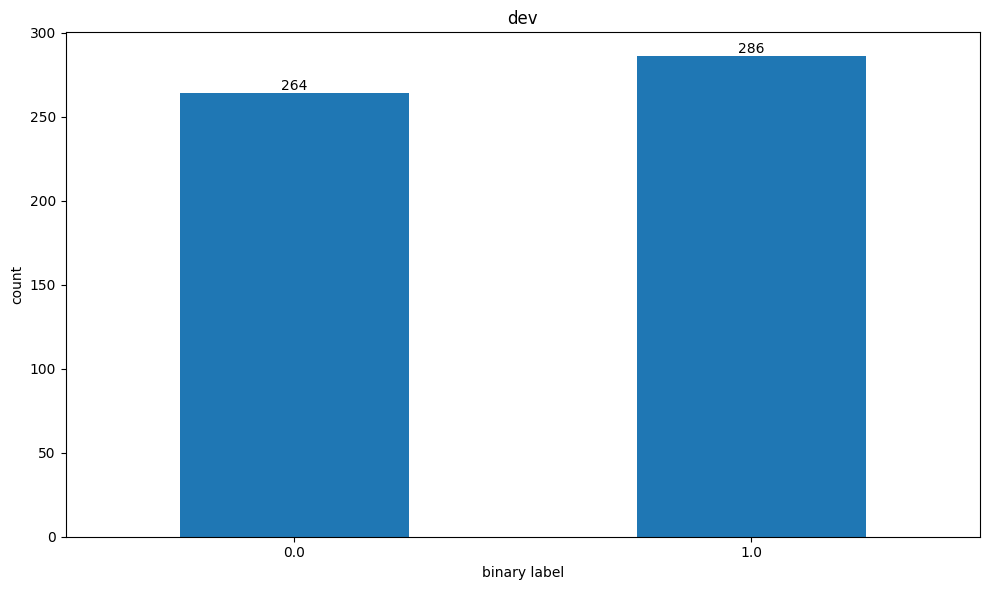

In [26]:
EDA(dev_df, "dev")

### 결측치 : 없음

In [27]:
import numpy as np
def missing_val(df):
    df_missing = df.copy()
    np.sum(df_missing.isnull())
    missing_number = df_missing.isnull().sum().sort_values(ascending=False)
    missing_percentage = missing_number/len(df_missing)
    missing_info = pd.concat([missing_number,missing_percentage],  axis=1, keys=['missing number','missing percentage'])
    print(missing_info)

In [28]:
missing_val(train_df)

                   missing number  missing percentage
id                              0                 0.0
source                          0                 0.0
sentence_1                      0                 0.0
sentence_2                      0                 0.0
label                           0                 0.0
binary-label                    0                 0.0
sentence_1_length               0                 0.0
sentence_2_length               0                 0.0


/Users/suakim/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [29]:
missing_val(test_df)

                   missing number  missing percentage
id                              0                 0.0
source                          0                 0.0
sentence_1                      0                 0.0
sentence_2                      0                 0.0
sentence_1_length               0                 0.0
sentence_2_length               0                 0.0


/Users/suakim/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [30]:
missing_val(dev_df)

                   missing number  missing percentage
id                              0                 0.0
source                          0                 0.0
sentence_1                      0                 0.0
sentence_2                      0                 0.0
label                           0                 0.0
binary-label                    0                 0.0
sentence_1_length               0                 0.0
sentence_2_length               0                 0.0


/Users/suakim/.pyenv/versions/3.11.0/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


## set간 분포 차이 - dataset에 따른 resource 분포 비교

In [39]:
def Data_Imbalance(train_df, test_df, dev_df):
    print(f"Train data 수 : {len(train_df)}")
    print(f"Test data 수 : {len(test_df)}")
    print(f"Dev data 수 : {len(dev_df)}")


    plt.figure(figsize=(12, 6))
    pd.concat([
        train_df['source'].value_counts(normalize=True),
        test_df['source'].value_counts(normalize=True),
        dev_df['source'].value_counts(normalize=True)
        ], axis=1, keys=['Train', 'Test', 'Dev']).plot(kind='bar')
    
    plt.ylabel("rate")
    plt.xticks(rotation=45)

    plt.show()




Train data 수 : 9324
Test data 수 : 1100
Dev data 수 : 550


<Figure size 1200x600 with 0 Axes>

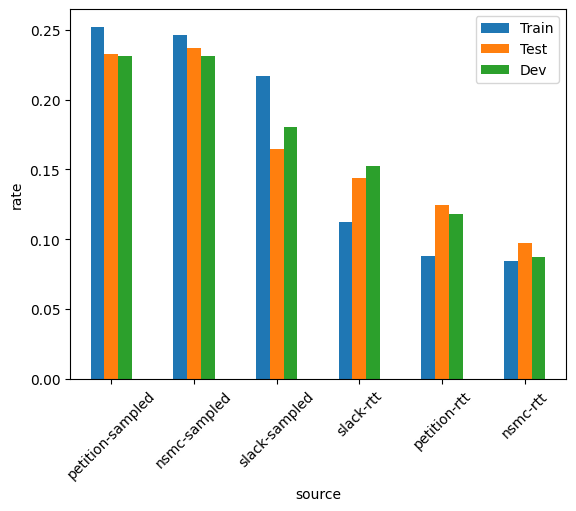

In [40]:
Data_Imbalance(train_df, test_df, dev_df)

## set간 분포 차이 - label 간 분포(train, dev)

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def Data_Imbalance2(train_df, dev_df):
    plt.figure(figsize=(10, 6))

    train_dist = train_df['label'].value_counts(normalize=True).sort_index()
    dev_dist = dev_df['label'].value_counts(normalize=True).sort_index()

    data = pd.concat([train_dist, dev_dist], axis=1, keys=['Train', 'Dev'])

    # 막대 그래프 그리기
    ax = data.plot(kind='bar', width=0.8)

    # 그래프 설정
    plt.title('Label Distribution(Train, Dev)')
    plt.xlabel('Label')
    plt.ylabel('Percentage')
    plt.legend()
    plt.xticks(rotation=45)

    plt.show()

    print(f"Train data 수: {len(train_df)}")
    print(f"Dev data 수: {len(dev_df)}")

<Figure size 1000x600 with 0 Axes>

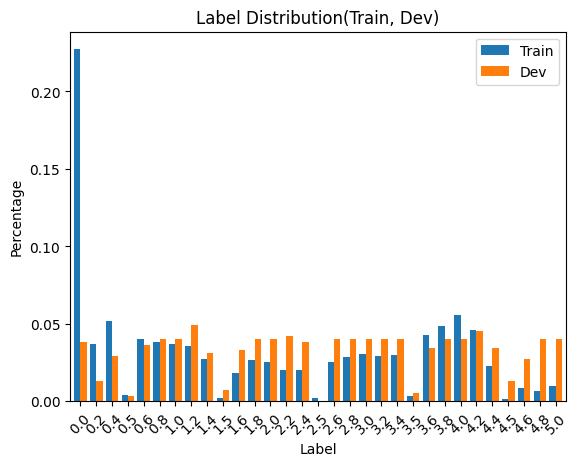

Train data 수: 9324
Dev data 수: 550


In [59]:
Data_Imbalance2(train_df, dev_df)

## 문장 길이와 label간 관계

In [60]:
def length_label(df):
    dataset = df[['sentence_1_length', 'sentence_2_length', 'label', 'binary-label']]
    sns.heatmap(dataset.corr(), annot=True)
    plt.show()

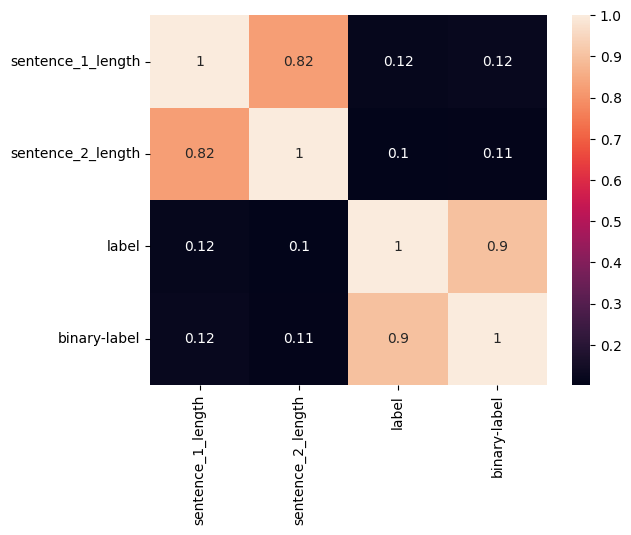

In [61]:
length_label(train_df)

1) sent1이 길면 sent2가 길다
2) 문장 길이와 label간의 상관관계는 별로 없어보임

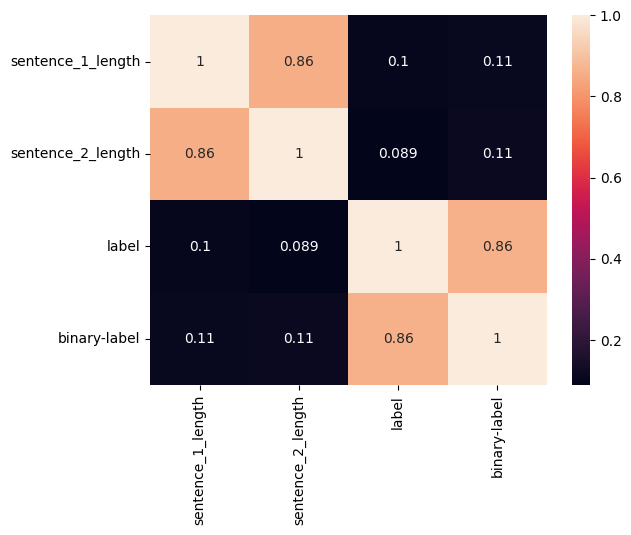

In [62]:
length_label(dev_df)